In [1]:
import json
import pandas as pd
import requests
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def resp_to_packets(resp_text):
    ''' Convert file to list of packets.'''
    packet = ''
    for line in resp_text.split('\n'):
        if line.startswith('}{'):
            packet += '}'
            yield json.loads(packet)
            packet = '{'
        else:
            packet += line + '\n'
    yield json.loads(packet)

In [3]:
def packet_to_df(packet):
    ''' Convert packet to data frame.'''
    df = list()
    for key, values in packet.items():
        t = (pd.json_normalize(values)
              .explode('co2')
              .explode('occupancy')
              .explode('temperature')
              .assign(room=key)
             )
        df.append(t)
    return pd.concat(df, ignore_index=True)

In [4]:
dtypes = {'co2': float, 'occupancy': int, 'temperature': float, 
          'time': 'datetime64', 'room': str}
url = 'https://gist.githubusercontent.com/tzelaya21/9b90dd07a3bdf49322f5b8019db73c96/raw/148ad3419d1520a478d3f0d7b66213ff7d84d76f/data.json'
r = requests.get(url)
assert r.ok

In [5]:
packets = (packet for packet in resp_to_packets(r.text))
dfs     = (packet_to_df(packet) for packet in packets)
df      = pd.concat(dfs, ignore_index=True).astype(dtype=dtypes)

In [6]:
lab1 = df.loc[df['room'] == 'lab1']
class1 = df.loc[df['room'] == 'class1']
office = df.loc[df['room'] == 'office']

lab1 = lab1.reset_index(drop=True)
class1 = class1.reset_index(drop=True)
office = office.reset_index(drop=True)

In [10]:
print("Lab1: Temperature median:  " + str(lab1.loc[:,"temperature"].median()))
print("Lab1: Temperature variance:  " + str(lab1.var()['temperature']))
print("Lab1: Occupancy median:  " + str(lab1.loc[:,"occupancy"].median()))
print("Lab1: Occupancy variance:  " + str(lab1.var()['occupancy']))

Lab1: Temperature median:  20.99627579600522
Lab1: Temperature variance:  1.8150198956379306
Lab1: Occupancy median:  4.0
Lab1: Occupancy variance:  5.346387203530061


PDF for Temperature


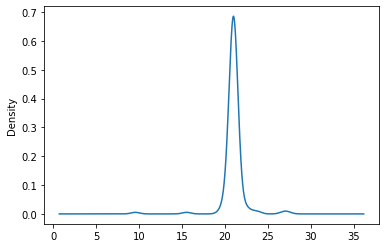

In [11]:
print("PDF for Temperature")
ax = lab1['temperature'].plot.kde()

PDF for CO2


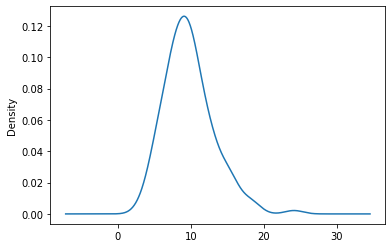

In [12]:
print("PDF for CO2")
ax1 = lab1['co2'].plot.kde()

PDF for Occupancy


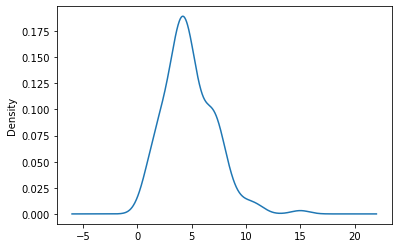

In [13]:
print("PDF for Occupancy")
ax2 = lab1['occupancy'].plot.kde()

In [14]:
df['interval'] = df['time'].sub(df['time'].shift())
df['interval'].iloc[0] = 0

for i in range (len(df)):
    df.loc[i, 'interval'] = str(df.loc[i, 'interval'])[-8:]

for i in range (len(df)):
    df.loc[i, 'interval'] = float(df.loc[i, 'interval'])
df['interval'].iloc[0] = np.nan

print("Mean of time interval is " + str(df.mean()['interval']))
print("Variance of time interval is " + str(df.var()['interval']))

Mean of time interval is 1.0331821333333342
Variance of time interval is 1.2406793162661827


PDF for Time Interval


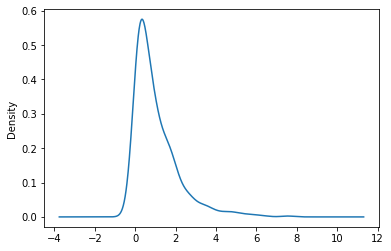

In [15]:
print("PDF for Time Interval")
ax = df['interval'].plot.kde()